**Assignment Number:** HW6

**Name:** Nghia Lam

**UTA ID:** 1001699317


## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

In this homework you need to test the model1 that we created in homework 5 for Assumptions and Multicollinearity. The code to create the model from homework 5 is already provided below. **You need to run these cells without making any changes**. Only write code for testing the Assumptions and Multicollinearity.

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.

Submission: Run all your code cells and export the file as HTML. Submit a zip of your .ipynb file and HTML file. 

Good luck!


**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
#Read in data
df =pd.read_csv('data.csv')

df.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.shape

(195, 15)

### Get dummy variables for fuel_type

In [4]:
##Do Not Change Code
df2=pd.get_dummies(df, columns=['fuel_type'],drop_first=True, dtype=np.uint8)

In [5]:
##Do Not Change Code
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1


In [6]:
##Do Not Change Code
X=df2.drop(['price'], axis=1)
y = df2['price']
X.columns

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas'],
      dtype='object')

In [7]:
##Do Not Change Code
Y1=np.array(y).reshape(-1,1)

In [8]:
##Do Not Change Code
X1=sm.add_constant(X)
X1

c:\Users\nghia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,fuel_type_gas
0,1.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1
1,1.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1
2,1.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1
3,1.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1
4,1.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,1
191,1.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,1
192,1.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,1
193,1.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0


In [9]:
##Do Not Change Code
model1=sm.OLS(y,X1).fit()
model1.summary(xname=['intercept','wheel_base', 'length', 'width', 'heights', 'curb_weight','engine_size', 'bore', 'stroke', 'comprassion', 'horse_power','peak_rpm', 'city_mpg', 'highway_mpg','fuel_type_gas'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           5.84e-69
Time:                        11:08:22   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      -4.45e+04   1.84e+04     -2.419      0.017   -8.08e+04   -8194.301
wheel_base       39.5305    103.549      0.382      0.703    -164.796     243.857
length          -60.6333     58.500     -1.036      0.301    -176.068      54.801
width           603.6414    254.539      2.372      0.019     101.377    1105.906
heights         329.5669    140.947      2.338      0.020      51.446     607.688
curb_weight       1.1798      1.738      0.679      0.498      -2.249       4.609
engine_size     138.4537     16.111      8.594      0.000     106.662     170.245
bore          -1208.4137   1206.683     -1.001      0.318   -3589.479    1172.651
stroke        -3706.0531    874.513     -4.238      0.000   -5431.669   -1980.437
comprassion    -617.1497    446.452     -1.382      0.169   -1498.103     263.804
horse_power      34.6328     18.049      1.919      0.057      -0.982      70.248
peak_rpm          2.5517      0.709      3.599      0.000       1.153       3.951
city_mpg       -288.2868    180.791     -1.595      0.113    -645.030      68.456
highway_mpg     316.6334    163.540      1.936      0.054      -6.069     639.336
fuel_type_gas -1.173e+04   6002.268     -1.955      0.052   -2.36e+04     110.854
==============================================================================
Omnibus:                       18.136   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.211
Skew:                           0.240   Prob(JB):                     1.03e-12
Kurtosis:                       5.562   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#variance of the model
model1.mse_resid

9802534.782392941

In [11]:
##Do Not Change Code
import statsmodels.formula.api as smf
# Fit the model
model1 = smf.ols(formula="price ~ fuel_type_gas  + wheel_base + length + width + heights + curb_weight + engine_size + bore + stroke + comprassion + horse_power + peak_rpm + city_mpg + highway_mpg", data=df2).fit()

# Print the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           5.84e-69
Time:                        11:08:22   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.45e+04   1.84e+04     -2.419

1. How do you interpret the intercept?
**The average price for a car with diesel fuel.**

2. How many variables are statistically significant?
**8 (5 if they are very picky) variables plus the intercept are significant at alpha=0.05**

3. What is the variance of the model?
**9802534.782392945**

4. What is the coefficeint of determination and how do you interpret it?
**86% of the variation in price is explained by the variables**

5. What is the F-statistics used for? How do you interpret it for this model?
**Goodness of fit test. H0: all coefficients are zero Ha: some of them are not zero. Here: reject null, some of the variables are good for the model**

### 1. Checking the assumptions:

- What are the assumptions?

- Do they hold?

Assumptions

    1. Linearity Assumption: The relationship between Y and Xj is linear for all predicting variables

    2. Constant Variance Assumption: Var(ei) = s2

    3. Independence Assumption: {e1,..., en} are independent random variables
    
    4. Normality Assumption: ei ~ Normal

In [12]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels


### Check for normality

c:\Users\nghia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


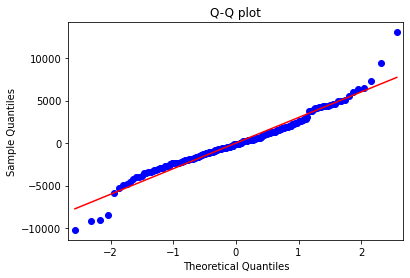

In [19]:
##your code goes here
sm.qqplot(model1.resid,line='s')
plt.title('Q-Q plot')
plt.show()


Normality: 
**The line for the residual for model1 does not fully fit the normal line for the Q-Q plot, thus I cannot say that it is normal.
At both ends of the plot there is an extreme change.**

   ### We cannot say it is normal

**If we get rid of the (outliers) at the end you could then definity say that this is normal. But until then this specific Q-Q plot is not normal**

### Check for constant variance

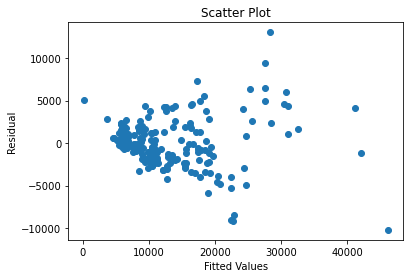

In [22]:
##your code goes here
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Scatter Plot')
plt.show()

constant variance: **Looking at the scatter plot the points are not evenly scattered evenly around zero and there appears to be a pattern taking shape simular to a cone. It also looks like as the fitted values increase the amount of points decrease therefore it is not evenly scattered.**

### Based on this it looks like this is not a homoscedastic senario, thus not a constant variance

### Plots to check linearity assumption:

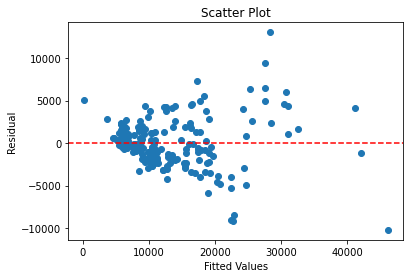

In [25]:
##your code goes here
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Scatter Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



Linearity assumption: **I can liner relationship for model1. It looks like it could be a straight line**

### I belive it fits the liner assumption.

### 2. Is there Multicollinearity in your data?

If you are working with arrays: Change array to dataframe. For each X, calculate VIF and save in dataframe. Anything above 10 will suggest multicollinearity

             wheel_base    length     width   heights  curb_weight  \
wheel_base     1.000000  0.879222  0.819009  0.592500     0.782720   
length         0.879222  1.000000  0.858084  0.496218     0.881665   
width          0.819009  0.858084  1.000000  0.315834     0.867315   
heights        0.592500  0.496218  0.315834  1.000000     0.307732   
curb_weight    0.782720  0.881665  0.867315  0.307732     1.000000   
engine_size    0.569704  0.687479  0.740320  0.031286     0.857573   
bore           0.498228  0.609437  0.544311  0.189283     0.645806   
stroke         0.171722  0.118664  0.186432 -0.055525     0.172785   
comprassion    0.247730  0.160172  0.190997  0.261160     0.155382   
horse_power    0.375541  0.583813  0.616779 -0.084412     0.760285   
peak_rpm      -0.352331 -0.280986 -0.251627 -0.264078    -0.278944   
city_mpg      -0.499126 -0.689660 -0.647099 -0.102367    -0.772171   
highway_mpg   -0.566355 -0.719324 -0.692220 -0.151188    -0.812710   
price          0.585

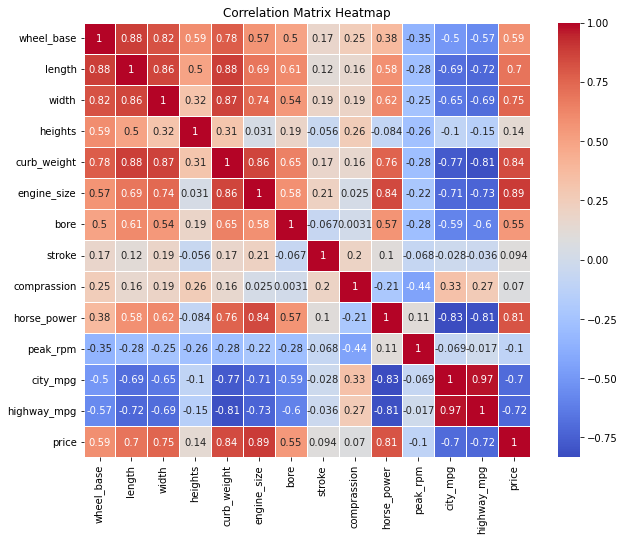

In [39]:
##your code goes here
corrMatrix = df.corr()
print(corrMatrix)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)

         Variable          VIF
0      wheel_base  2071.483050
1          length  2019.931702
2           width  3017.390516
3         heights  1019.553923
4     curb_weight   408.567248
5     engine_size    90.136515
6            bore   286.603183
7          stroke   141.468684
8     comprassion   383.878658
9     horse_power    77.632797
10       peak_rpm   261.664640
11       city_mpg   444.985044
12    highway_mpg   527.362453
13  fuel_type_gas   489.701748



Multicollinearity:
**Everything has a really high VIF. These high VIF values suggest that there is a substantial amount of multicollinearity among these variables**

### There is alot of multicollinearity amoung these variables